# 데이터셋 변수 재설정

* ``딥러닝은 Supervised learning이다. 그러므로 Regression을 하더라도 train할 때는 답이 존재해야 한다.``
- 1. 따라서 답에 해당하는 값이 1주일 뒤의 미래값이므로 ``답(y값)을 한 칸씩 땡기기``
- 2. y값의 현재값은 y값의 미래값을 예측하는 데 대단한 영향을 끼치기 때문에 원본 데이터의 y값이였던 ``현재 '한우 가격'을 Feature로 사용``
    * 이런 feature추가하는 것이 예측하고자 하는 미래값을 현재값의 feature에 포함시키는 것이 절!대! 아님!! 잘생각해보길!!
- 3. 미래값을 예측하는 많은 방법 중 하나인 ``'단순이동평균'을 Feature로 사용``
    * 이 때도 잘 생각해봐야 할 것이 단순이동평균을 한 값은 위에서 ``한 칸씩 땡긴 y값(답)``에 대한 이동평균이다. 이 때 미래값을 넣은 것이 아니냐 생각할 수 있지만 아니다! 이에 대한 것은 밑의 그림을 보고 이해하자. 결론은 '단순이동평균법'도 미래값을 예측하는 하나의 방법론이고 이것을 feature로 사용하는 것이 우리가 예측하려는 미래의값을 현재 데이터의 feature로 사용하는 게 절대 아니다!
    * m=2값으로 설정


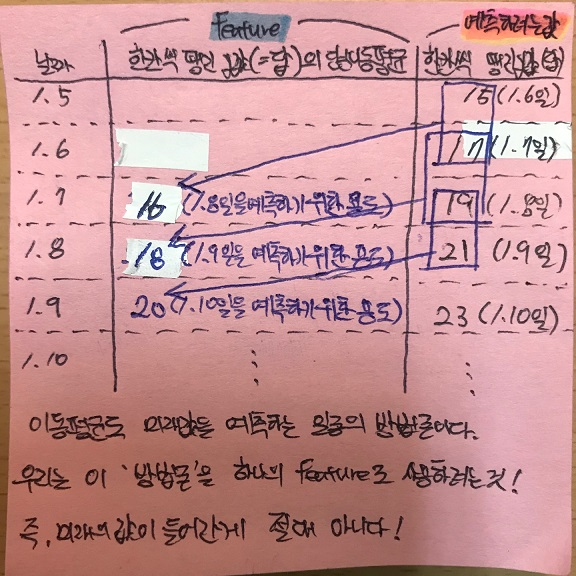

In [43]:
# 단순이동평균을 feature로 사용할 수 있는 이유에 대한 예시

from IPython.display import Image
jpg_dir= 'C:/Users/joyh1/Desktop/DSC/DSC_음메/'
Image(jpg_dir+"ma.jpg") # code안에서 나오게 할 때

In [2]:
import pandas as pd
import numpy as np

In [3]:
fold_dir = 'C:/Users/joyh1/Desktop/DSC/DSC_음메/cow_data/final_data/'
data = pd.read_pickle(fold_dir+'modeling_final_dataset.pkl')
data.shape

(296, 29)

In [4]:
data.columns

Index(['주간날짜', 'breed_cow_sd', 'no_breed_cow_sd', '미국소_생산량(가격화한값)',
       '수출 (100만달러)', '수입 (100만달러)', '소비자물가지수 (2010=100)', '수입소고기_총량', '평균기온',
       '최저기온', '최고기온', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)', '한우 평균경매 금액_주간평균',
       '명절유무', '번식우', '번식우_no', 'y값_단순이동평균(m=2)', 'y값_잔차', 'y값_차이', 'y값_잔차_편차',
       'y값_잔차_before', 'y값_잔차_ma', 'y값_잔차_median(3)', 'y값_잔차_median(5)',
       'y값_잔차_hampel', '돼지가격_평균', 'pig_resid'],
      dtype='object')

In [5]:
pd.options.display.max_columns = 30
data.head()

,주간날짜,breed_cow_sd,no_breed_cow_sd,미국소_생산량(가격화한값),수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%),한우 평균경매 금액_주간평균,명절유무,번식우,번식우_no,y값_단순이동평균(m=2),y값_잔차,y값_차이,y값_잔차_편차,y값_잔차_before,y값_잔차_ma,y값_잔차_median(3),y값_잔차_median(5),y값_잔차_hampel,돼지가격_평균,pig_resid
0,2013-01-20,12.851852,-58.148148,226130.0,559632,515586,98,28623,1.5,-2.2,2.7,0.1,40.0,64.9,13465.000,0,1580,916,NaN,1.105815,NaN,0.106803,NaN,NaN,1.088453,1.088453,1.105815,3016.0,457.756230
1,2013-01-27,12.851852,-58.148148,226130.0,559632,515586,98,28623,3.8,-0.9,9.3,0.4,40.0,63.0,12749.400,1,1580,916,NaN,1.088453,NaN,0.089442,-0.017361,NaN,1.098656,1.088453,1.088453,2960.2,407.797081
2,2013-02-03,12.851852,-58.148148,187340.0,559632,515586,98,18241,1.5,-1.9,4.5,0.8,22.0,48.4,12377.200,1,1580,916,13107.2,1.098656,-715.6,0.099645,0.010203,1.097134,1.088453,1.088453,1.098656,2967.8,583.145676
3,2013-02-10,12.851852,-58.148148,187340.0,559632,515586,98,18241,0.5,-3.8,4.9,0.4,21.0,37.3,12380.800,0,1580,916,12563.3,1.082801,-372.2,0.083790,-0.015855,1.093555,1.082801,1.082801,1.082801,2730.4,233.823334
4,2013-02-17,12.851852,-58.148148,187340.0,559632,515586,98,18241,1.6,-2.9,6.4,2.2,19.0,32.6,12001.333,0,1580,916,12379.0,1.005589,3.6,0.006578,-0.077212,1.090729,1.047936,1.047936,1.005589,2811.0,138.110980


In [6]:
data['feature_y'] = ''
data['price_y'] = ''

for i in range(0,len(data.index)-2):
    data['price_y'][i] = data['한우 평균경매 금액_주간평균'][i+2]
    
for i in range(0, len(data.index)-1):
    data['feature_y'][i] = data['한우 평균경매 금액_주간평균'][i+1]
data.head()

C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\joyh1\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,주간날짜,breed_cow_sd,no_breed_cow_sd,미국소_생산량(가격화한값),수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%),한우 평균경매 금액_주간평균,...,번식우,번식우_no,y값_단순이동평균(m=2),y값_잔차,y값_차이,y값_잔차_편차,y값_잔차_before,y값_잔차_ma,y값_잔차_median(3),y값_잔차_median(5),y값_잔차_hampel,돼지가격_평균,pig_resid,feature_y,price_y
0,2013-01-20,12.851852,-58.148148,226130.0,559632,515586,98,28623,1.5,-2.2,2.7,0.1,40.0,64.9,13465.000,...,1580,916,NaN,1.105815,NaN,0.106803,NaN,NaN,1.088453,1.088453,1.105815,3016.0,457.756230,12749.4,12377.2
1,2013-01-27,12.851852,-58.148148,226130.0,559632,515586,98,28623,3.8,-0.9,9.3,0.4,40.0,63.0,12749.400,...,1580,916,NaN,1.088453,NaN,0.089442,-0.017361,NaN,1.098656,1.088453,1.088453,2960.2,407.797081,12377.2,12380.8
2,2013-02-03,12.851852,-58.148148,187340.0,559632,515586,98,18241,1.5,-1.9,4.5,0.8,22.0,48.4,12377.200,...,1580,916,13107.2,1.098656,-715.6,0.099645,0.010203,1.097134,1.088453,1.088453,1.098656,2967.8,583.145676,12380.8,12001.3
3,2013-02-10,12.851852,-58.148148,187340.0,559632,515586,98,18241,0.5,-3.8,4.9,0.4,21.0,37.3,12380.800,...,1580,916,12563.3,1.082801,-372.2,0.083790,-0.015855,1.093555,1.082801,1.082801,1.082801,2730.4,233.823334,12001.3,12000.4
4,2013-02-17,12.851852,-58.148148,187340.0,559632,515586,98,18241,1.6,-2.9,6.4,2.2,19.0,32.6,12001.333,...,1580,916,12379.0,1.005589,3.6,0.006578,-0.077212,1.090729,1.047936,1.047936,1.005589,2811.0,138.110980,12000.4,11728.2


In [7]:
data.tail()

,주간날짜,breed_cow_sd,no_breed_cow_sd,미국소_생산량(가격화한값),수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%),한우 평균경매 금액_주간평균,...,번식우,번식우_no,y값_단순이동평균(m=2),y값_잔차,y값_차이,y값_잔차_편차,y값_잔차_before,y값_잔차_ma,y값_잔차_median(3),y값_잔차_median(5),y값_잔차_hampel,돼지가격_평균,pig_resid,feature_y,price_y
291,2018-08-19,190.851852,-70.148148,242960.0,604860,535202,104,42590,25.1,21.3,27.9,26.2,54.0,72.4,17902.5,...,1758,904,17553.90,0.970547,889.4,-0.028464,-0.007433,0.962327,0.970547,0.954910,0.970547,5158.75,245.322091,17787,17877.8
292,2018-08-26,190.851852,-70.148148,242960.0,604860,535202,104,42590,23.2,20.9,27.2,24.5,54.0,77.4,17787.0,...,1758,904,17950.55,0.954910,-96.1,-0.044102,-0.015637,0.974264,0.954910,0.954910,0.954910,5207.60,202.237094,17877.8,18128.2
293,2018-09-02,190.851852,-70.148148,215750.0,604860,535202,104,34151,22.4,19.6,25.9,24.4,40.0,60.1,17877.8,...,1758,904,17844.75,0.942451,-115.5,-0.056561,-0.012459,0.962729,0.942451,0.954910,0.942451,5439.40,389.366681,18128.2,18531.8
294,2018-09-09,190.851852,-70.148148,215750.0,604860,535202,104,34151,19.4,16.0,23.3,22.1,62.0,77.3,18128.2,...,1758,904,17832.40,0.941001,90.8,-0.058010,-0.001449,0.948680,0.942451,0.942451,0.941001,5573.60,450.529842,18531.8,
295,2018-09-16,190.851852,-70.148148,215750.0,604860,535202,104,34151,21.1,17.2,24.8,22.4,58.0,78.5,18531.8,...,1758,904,18003.00,0.990056,250.4,-0.008955,0.049055,0.941726,0.941001,0.941001,0.990056,5728.20,893.091772,,


In [8]:
cols = data.columns
not_cols = cols[cols.str.contains('y값|resid')]
not_cols

Index(['y값_단순이동평균(m=2)', 'y값_잔차', 'y값_차이', 'y값_잔차_편차', 'y값_잔차_before',
       'y값_잔차_ma', 'y값_잔차_median(3)', 'y값_잔차_median(5)', 'y값_잔차_hampel',
       'pig_resid'],
      dtype='object')

In [9]:
data = data.drop(not_cols, axis=1)

In [10]:
data.head()

,주간날짜,breed_cow_sd,no_breed_cow_sd,미국소_생산량(가격화한값),수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%),한우 평균경매 금액_주간평균,명절유무,번식우,번식우_no,돼지가격_평균,feature_y,price_y
0,2013-01-20,12.851852,-58.148148,226130.0,559632,515586,98,28623,1.5,-2.2,2.7,0.1,40.0,64.9,13465.000,0,1580,916,3016.0,12749.4,12377.2
1,2013-01-27,12.851852,-58.148148,226130.0,559632,515586,98,28623,3.8,-0.9,9.3,0.4,40.0,63.0,12749.400,1,1580,916,2960.2,12377.2,12380.8
2,2013-02-03,12.851852,-58.148148,187340.0,559632,515586,98,18241,1.5,-1.9,4.5,0.8,22.0,48.4,12377.200,1,1580,916,2967.8,12380.8,12001.3
3,2013-02-10,12.851852,-58.148148,187340.0,559632,515586,98,18241,0.5,-3.8,4.9,0.4,21.0,37.3,12380.800,0,1580,916,2730.4,12001.3,12000.4
4,2013-02-17,12.851852,-58.148148,187340.0,559632,515586,98,18241,1.6,-2.9,6.4,2.2,19.0,32.6,12001.333,0,1580,916,2811.0,12000.4,11728.2


In [11]:
del data['한우 평균경매 금액_주간평균']
data.columns

Index(['주간날짜', 'breed_cow_sd', 'no_breed_cow_sd', '미국소_생산량(가격화한값)',
       '수출 (100만달러)', '수입 (100만달러)', '소비자물가지수 (2010=100)', '수입소고기_총량', '평균기온',
       '최저기온', '최고기온', '평균지면온도', '최소상대습도(%)', '평균상대습도(%)', '명절유무', '번식우',
       '번식우_no', '돼지가격_평균', 'feature_y', 'price_y'],
      dtype='object')

In [12]:
data = data.rename(columns={'feature_y':'한우가격_당일값'})
data = data.rename(columns={'price_y':'한우가격_미래값'})
data.head()

,주간날짜,breed_cow_sd,no_breed_cow_sd,미국소_생산량(가격화한값),수출 (100만달러),수입 (100만달러),소비자물가지수 (2010=100),수입소고기_총량,평균기온,최저기온,최고기온,평균지면온도,최소상대습도(%),평균상대습도(%),명절유무,번식우,번식우_no,돼지가격_평균,한우가격_당일값,한우가격_미래값
0,2013-01-20,12.851852,-58.148148,226130.0,559632,515586,98,28623,1.5,-2.2,2.7,0.1,40.0,64.9,0,1580,916,3016.0,12749.4,12377.2
1,2013-01-27,12.851852,-58.148148,226130.0,559632,515586,98,28623,3.8,-0.9,9.3,0.4,40.0,63.0,1,1580,916,2960.2,12377.2,12380.8
2,2013-02-03,12.851852,-58.148148,187340.0,559632,515586,98,18241,1.5,-1.9,4.5,0.8,22.0,48.4,1,1580,916,2967.8,12380.8,12001.3
3,2013-02-10,12.851852,-58.148148,187340.0,559632,515586,98,18241,0.5,-3.8,4.9,0.4,21.0,37.3,0,1580,916,2730.4,12001.3,12000.4
4,2013-02-17,12.851852,-58.148148,187340.0,559632,515586,98,18241,1.6,-2.9,6.4,2.2,19.0,32.6,0,1580,916,2811.0,12000.4,11728.2


In [13]:
# 기상변수, 세계경제 지표 칼럼 제거
not_cols = ['수출 (100만달러)','수입 (100만달러)','소비자물가지수 (2010=100)',
            '수입소고기_총량','평균기온','최저기온','최고기온','평균지면온도','최소상대습도(%)','평균상대습도(%)']
final_data = data.drop(not_cols, axis=1)
final_data.columns

Index(['주간날짜', 'breed_cow_sd', 'no_breed_cow_sd', '미국소_생산량(가격화한값)', '명절유무',
       '번식우', '번식우_no', '돼지가격_평균', '한우가격_당일값', '한우가격_미래값'],
      dtype='object')

In [14]:
# 영어 변수명 한글로 바꾸기
final_data = final_data.rename(columns={'breed_cow_sd':'번식우_편차'})
final_data = final_data.rename(columns={'no_breed_cow_sd':'번식우_no_편차'})
final_data = final_data.rename(columns={'한우가격_미래값':'한우가격_미래값(y값)'})

# 변수이름 순서 정리
cols_order = ['주간날짜','번식우','번식우_no','번식우_편차','번식우_no_편차',
             '미국소_생산량(가격화한값)','돼지가격_평균','명절유무','한우가격_당일값','한우가격_미래값(y값)']

final_data = final_data[cols_order]
final_data.head()

,주간날짜,번식우,번식우_no,번식우_편차,번식우_no_편차,미국소_생산량(가격화한값),돼지가격_평균,명절유무,한우가격_당일값,한우가격_미래값(y값)
0,2013-01-20,1580,916,12.851852,-58.148148,226130.0,3016.0,0,12749.4,12377.2
1,2013-01-27,1580,916,12.851852,-58.148148,226130.0,2960.2,1,12377.2,12380.8
2,2013-02-03,1580,916,12.851852,-58.148148,187340.0,2967.8,1,12380.8,12001.3
3,2013-02-10,1580,916,12.851852,-58.148148,187340.0,2730.4,0,12001.3,12000.4
4,2013-02-17,1580,916,12.851852,-58.148148,187340.0,2811.0,0,12000.4,11728.2


In [20]:
# 끝에 데이터 짤라주기
final_data = final_data.iloc[:294].copy()
final_data.tail()

,주간날짜,번식우,번식우_no,번식우_편차,번식우_no_편차,미국소_생산량(가격화한값),돼지가격_평균,명절유무,한우가격_당일값,한우가격_미래값(y값)
289,2018-08-05,1758,904,190.851852,-70.148148,242960.0,4699.40,0,17998.6,17902.5
290,2018-08-12,1758,904,190.851852,-70.148148,242960.0,5037.20,0,17902.5,17787
291,2018-08-19,1758,904,190.851852,-70.148148,242960.0,5158.75,0,17787,17877.8
292,2018-08-26,1758,904,190.851852,-70.148148,242960.0,5207.60,0,17877.8,18128.2
293,2018-09-02,1758,904,190.851852,-70.148148,215750.0,5439.40,0,18128.2,18531.8


In [22]:
final_data['한우가격_당일값'] = final_data['한우가격_당일값'].astype(float)
final_data['한우가격_미래값(y값)'] = final_data['한우가격_미래값(y값)'].astype(float)

final_data.dtypes

주간날짜              datetime64[ns]
번식우                        int32
번식우_no                     int64
번식우_편차                   float64
번식우_no_편차                float64
미국소_생산량(가격화한값)           float64
돼지가격_평균                  float64
명절유무                       int64
한우가격_당일값                 float64
한우가격_미래값(y값)             float64
dtype: object

In [23]:
len(final_data['한우가격_당일값'])

294

In [24]:
# 당일값_편차 만들어내는 알고리즘 만들기 => 만약 새로운 input데이터가 들어오게 되면 그에 맞게 편차가 계산되어야함!
# 왜냐하면 새로운 input데이터가 들어왔을 때는 그 input데이터가 들어오기 전의 값들만 알고있는 상태기 때문에
# 그렇다면 이 편차 feature를 위한 알고리즘을 머신러닝 모델링안에 넣어서 새로운 input이 들어올때 마다 업데이트 시켜주어야 할듯
df = final_data
deviation_list = []
for i in range(0, len(df.index)):
    deviation = df['한우가격_당일값'][i] - df['한우가격_당일값'][0:i].mean()
    deviation_list.append(deviation)
len(deviation_list)

294

In [26]:
final_data['한우가격_당일값_편차'] = np.array(deviation_list)
final_data.head()

,주간날짜,번식우,번식우_no,번식우_편차,번식우_no_편차,미국소_생산량(가격화한값),돼지가격_평균,명절유무,한우가격_당일값,한우가격_미래값(y값),한우가격_당일값_편차
0,2013-01-20,1580,916,12.851852,-58.148148,226130.0,3016.0,0,12749.400,12377.200,NaN
1,2013-01-27,1580,916,12.851852,-58.148148,226130.0,2960.2,1,12377.200,12380.800,-372.200000
2,2013-02-03,1580,916,12.851852,-58.148148,187340.0,2967.8,1,12380.800,12001.333,-182.500000
3,2013-02-10,1580,916,12.851852,-58.148148,187340.0,2730.4,0,12001.333,12000.400,-501.133667
4,2013-02-17,1580,916,12.851852,-58.148148,187340.0,2811.0,0,12000.400,11728.250,-376.783250


In [31]:
# m=2일때 단순이동평균 칼럼 만들고 한칸 shift하기
final_data['한우가격_미래값(y값)_MA'] = final_data['한우가격_미래값(y값)'].rolling(2).mean().shift(1)
final_data.columns

Index(['주간날짜', '번식우', '번식우_no', '번식우_편차', '번식우_no_편차', '미국소_생산량(가격화한값)',
       '돼지가격_평균', '명절유무', '한우가격_당일값', '한우가격_미래값(y값)', '한우가격_당일값_편차',
       '한우가격_미래값(y값)_MA'],
      dtype='object')

In [32]:
# 변수명 순서 재정렬
cols_order = ['주간날짜','번식우','번식우_no','번식우_편차','번식우_no_편차','미국소_생산량(가격화한값)',
             '돼지가격_평균','명절유무','한우가격_당일값_편차','한우가격_당일값','한우가격_미래값(y값)_MA',
             '한우가격_미래값(y값)']
final_data_0531 = final_data[cols_order]
final_data_0531.head()

,주간날짜,번식우,번식우_no,번식우_편차,번식우_no_편차,미국소_생산량(가격화한값),돼지가격_평균,명절유무,한우가격_당일값_편차,한우가격_당일값,한우가격_미래값(y값)_MA,한우가격_미래값(y값)
0,2013-01-20,1580,916,12.851852,-58.148148,226130.0,3016.0,0,NaN,12749.400,NaN,12377.200
1,2013-01-27,1580,916,12.851852,-58.148148,226130.0,2960.2,1,-372.200000,12377.200,NaN,12380.800
2,2013-02-03,1580,916,12.851852,-58.148148,187340.0,2967.8,1,-182.500000,12380.800,12379.0000,12001.333
3,2013-02-10,1580,916,12.851852,-58.148148,187340.0,2730.4,0,-501.133667,12001.333,12191.0665,12000.400
4,2013-02-17,1580,916,12.851852,-58.148148,187340.0,2811.0,0,-376.783250,12000.400,12000.8665,11728.250


* NA값은 추후에 짜르든가 하기 또 없애거나 대체값 채우면 헷갈릴 것 같아서...!

In [33]:
# pickle 파일로 저장
import pickle
with open(fold_dir+'final_data_0531', 'wb') as f:
    pickle.dump(final_data_0531, f)

In [38]:
(19+21)/2


20.0